In [2]:
import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)

# Linear Regression

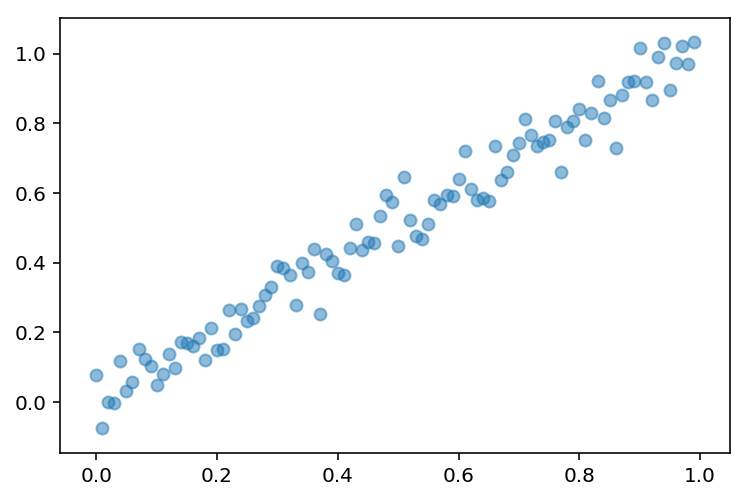

In [2]:
x = np.arange(100)/100
y = x + np.random.normal(scale=0.05, size=100)

plt.scatter(x, y, alpha=0.5);

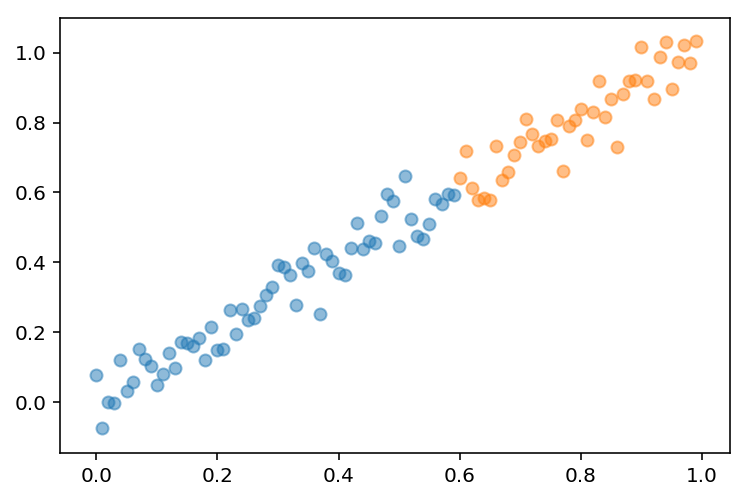

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, shuffle=False)
plt.scatter(x_train, y_train, alpha=0.5)
plt.scatter(x_val, y_val, alpha=0.5);

In [7]:
x_train = x_train[:, None]
x_val = x_val[:, None]

In [8]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')

In [11]:
score()

Scores:
Train      = 0.9215
Validation = 0.8156


In [12]:
pred_train = m.predict(x_train)
pred_val = m.predict(x_val)

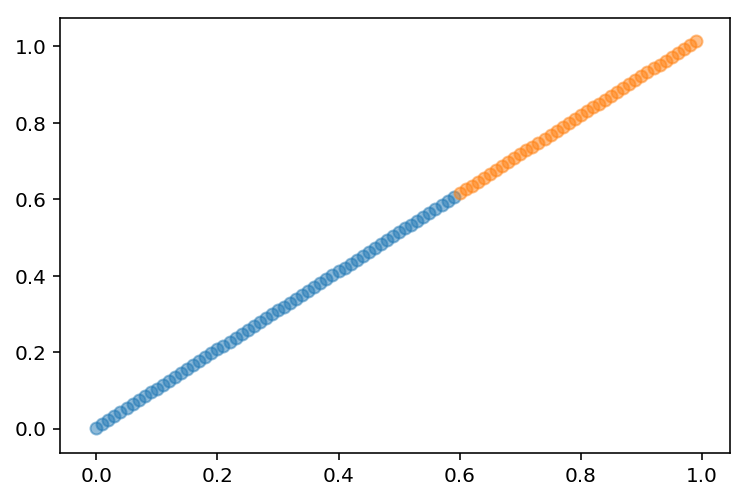

In [13]:
plt.scatter(x_train, pred_train, alpha=0.5)
plt.scatter(x_val, pred_val, alpha=0.5);

## Revisitando House Sales Prediction Dataset

House Sales Prediction Data Set: https://www.kaggle.com/harlfoxem/housesalesprediction/home

Abstract: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

- **id**: a notation for a house
- **date**: Date house was sold
- **price**: Price is prediction target
- **bedrooms**: Number of Bedrooms/House
- **bathrooms**: Number of bathrooms/bedrooms
- **sqft_living**: square footage of the home
- **sqft_lot**: square footage of the lot
- **floors**: Total floors (levels) in house
- **waterfront**: House which has a view to a waterfront
- **view**: Has been viewed
- **condition**: How good the condition is ( Overall )
- **grade**: overall grade given to the housing unit, based on King County grading system
- **sqft_above**: square footage of house apart from basement
- **sqft_basement**: square footage of the basement
- **yr_built**: Built Year
- **yr_renovated**: Year when house was renovated
- **zipcode**: zip
- **lat**: Latitude coordinate
- **long**: Longitude coordinate
- **sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15**: lotSize area in 2015(implies-- some renovations)

In [3]:
df_raw = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])
print(df_raw.shape)
df_raw.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Preprocesamiento (Día 2)

In [4]:
# Borramos la variable "id"
df_raw.drop('id', axis=1, inplace=True)

# Convertimos el target a escala logarítmica
df_raw['price'] = np.log(df_raw.price)

# Obtenemos atributos a partir de la fecha
date_attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
             'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

for n in date_attr:
    df_raw['date_' + n] = getattr(df_raw['date'].dt, n.lower())

df_raw['date_elapsed'] = df_raw['date'].astype(np.int64) // 10 ** 9

df_raw.drop('date', axis=1, inplace=True)

# "date_Is_year_start" tiene el mismo valor para todo el dataset
df_raw.drop('date_Is_year_start', axis=1, inplace=True)

df_raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_Year,date_Month,date_Week,date_Day,date_Dayofweek,date_Dayofyear,date_Is_month_end,date_Is_month_start,date_Is_quarter_end,date_Is_quarter_start,date_Is_year_end,date_elapsed
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,42,13,0,286,False,False,False,False,False,1413158400
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,50,9,1,343,False,False,False,False,False,1418083200
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,9,25,2,56,False,False,False,False,False,1424822400
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,50,9,1,343,False,False,False,False,False,1418083200
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,8,18,2,49,False,False,False,False,False,1424217600


### Train-validation split

In [89]:
from sklearn.model_selection import train_test_split

x = df_raw.drop('price', axis=1)
y = df_raw['price']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (17290, 30)
Validation shape: (4323, 30)


In [90]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
score() 

Scores:
Train      = 0.7732
Validation = 0.7734


In [44]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, m.predict(x_train)), mean_squared_error(y_val, m.predict(x_val))

(0.062456656374644356, 0.0645821556622289)

In [94]:
imp = pd.DataFrame({'col':x_train.columns, 
                    'importance':m.coef_}).sort_values(
    'importance', ascending=False)
imp

,col,importance
14,lat,1.4045
19,date_Month,0.7136
5,waterfront,0.3763
8,grade,0.1566
4,floors,0.0756
1,bathrooms,0.0735
7,condition,0.0635
6,view,0.0618
26,date_Is_quarter_end,0.0502
27,date_Is_quarter_start,0.0232


In [50]:
m.predict(x_val)[0]

12.963792256402623

In [51]:
m.intercept_

-8.402333308553768

In [48]:
x_val.iloc[0]

bedrooms                                   4
bathrooms                             2.2500
sqft_living                             2070
sqft_lot                                8893
floors                                2.0000
waterfront                                 0
view                                       0
condition                                  4
grade                                      8
sqft_above                              2070
sqft_basement                              0
yr_built                                1986
yr_renovated                               0
zipcode                                98058
lat                                  47.4388
long                               -122.1620
sqft_living15                           2390
sqft_lot15                              7700
date_Year                               2014
date_Month                                10
date_Week                                 41
date_Day                                   6
date_Dayof

In [96]:
x0 = pd.DataFrame(x_val.iloc[0].rename('value'))
x0['col'] = x0.index
x0 = pd.merge(x0, imp, on='col')
x0['contribution'] = x0.value * x0.importance

In [97]:
x0.sort_values('contribution', ascending=False)

,value,col,importance,contribution
14,47.4388,lat,1.4045,66.6277
15,-122.1620,long,-0.1364,16.6620
19,10,date_Month,0.7136,7.1356
29,1412553600,date_elapsed,0.0000,3.3106
8,8,grade,0.1566,1.2527
7,4,condition,0.0635,0.2539
16,2390,sqft_living15,0.0001,0.2340
2,2070,sqft_living,0.0001,0.2010
1,2.2500,bathrooms,0.0735,0.1654
4,2.0000,floors,0.0756,0.1513


In [72]:
m.intercept_ + x0.contribution.sum()

12.96379225640263

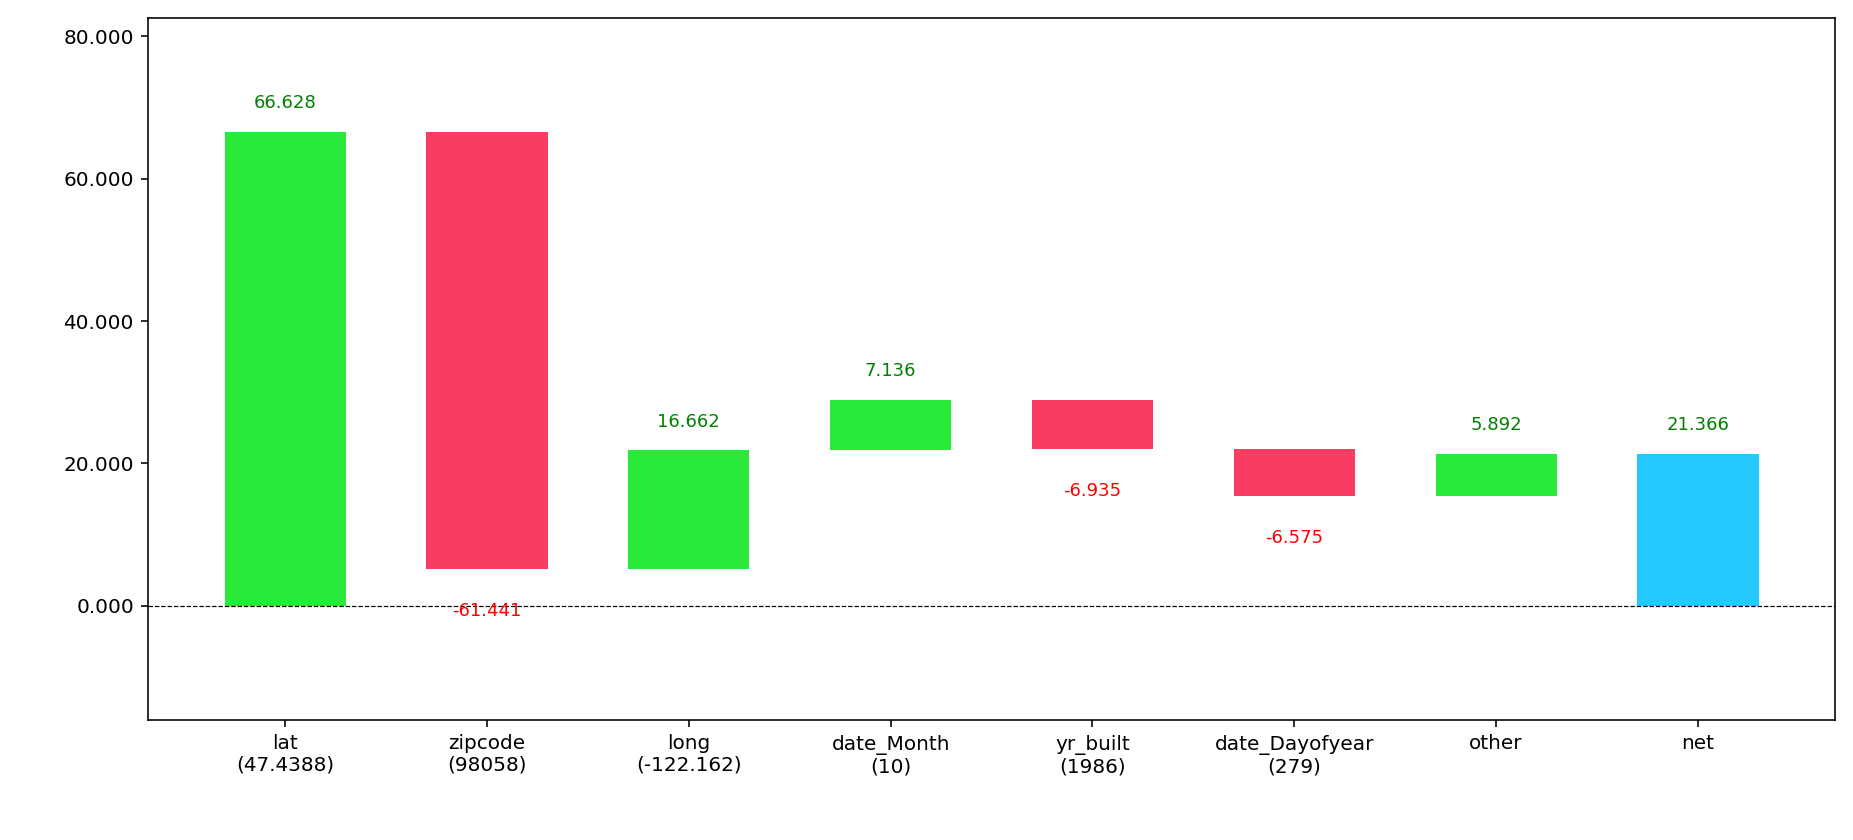

In [105]:
from utils import waterfallplot
waterfallplot(x_val.head(1), x0.contribution, formatting='{:,.3f}', size=(13,6), sorted_value=True, threshold=0.05);

# Logistic Regression

## Revisitando Census Income Dataset

Census Income Data Set: http://mlr.cs.umass.edu/ml/datasets/Census+Income

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

* **age:** continuous.
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt:** continuous.
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num:** continuous.
* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex:** Female, Male.
* **capital-gain:** continuous.
* **capital-loss:** continuous.
* **hours-per-week:** continuous.
* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [124]:
df_raw = pd.read_csv('data/census_train.csv')
df_test = pd.read_csv('data/census_test.csv')
print(df_raw.shape, df_test.shape)
df_raw.head(3)

(32561, 15) (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Preprocesamiento (Día 2)

In [126]:
df_raw = df_raw.drop('education', axis=1) \
                .rename({'education-num': 'education'}, axis=1)

for n, col in df_raw.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'label':
        # Transforma la variable a tipo category
        df_raw[n] = col.astype('category')
        
df = df_raw.copy()

# Convertir cada columna categórica a numérica
for n,col in df.items():
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,8,77516,13,5,2,2,5,2,2174,0,40,40,<=50K
1,50,7,83311,13,3,5,1,5,2,0,0,13,40,<=50K
2,38,5,215646,9,1,7,2,5,2,0,0,40,40,<=50K
3,53,5,234721,7,3,7,1,3,2,0,0,40,40,<=50K
4,28,5,338409,13,3,11,6,3,1,0,0,40,6,<=50K


### Probando el modelo (holdout validation)

In [128]:
from sklearn.model_selection import train_test_split

x = df.drop('label', axis=1)
y = df['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (26048, 13)
Validation shape: (6513, 13)


In [134]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
score()

Scores:
Train      = 0.792
Validation = 0.7932


### Probando el modelo (cross validation)

In [138]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [140]:
x = df.drop('label', axis=1)
y = df['label']

train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression()
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.792
Validation = 0.7933

Scores:
Train      = 0.8032
Validation = 0.807

Scores:
Train      = 0.8069
Validation = 0.8019

Scores:
Train      = 0.8025
Validation = 0.7987

Scores:
Train      = 0.7937
Validation = 0.7978

Average Scores:
Train      = 0.7997
Validation = 0.7997


### Variables categóricas: One-hot encoding

In [148]:
df_raw.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [174]:
x = df_raw.drop('label', axis=1)
y = df_raw['label']

x = pd.get_dummies(x, drop_first=True)
x.shape

(32561, 85)

In [175]:
x.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Variables continuas: Normalización

In [179]:
df_raw['workclass'].dtypes

CategoricalDtype(categories=[' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
                  ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
                  ' State-gov', ' Without-pay'],
                 ordered=False)

In [185]:
cont_cols = [col for col in df_raw if \
             pd.api.types.is_numeric_dtype(df_raw[col])]

In [186]:
cont_cols

['age',
 'fnlwgt',
 'education',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x[cont_cols])

In [189]:
for col, scaled_data in zip(cont_cols, scaled_x.T):
    x[col] = scaled_data

In [190]:
x.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0307,-1.0636,1.1347,0.1485,-0.2167,-0.0354,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.8371,-1.0087,1.1347,-0.1459,-0.2167,-2.2222,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.0426,0.2451,-0.4201,-0.1459,-0.2167,-0.0354,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0570,0.4258,-1.1975,-0.1459,-0.2167,-0.0354,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.7758,1.4082,1.1347,-0.1459,-0.2167,-0.0354,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
train_scores, val_scores = [], []
for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression()
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.8522
Validation = 0.8581

Scores:
Train      = 0.8539
Validation = 0.8503

Scores:
Train      = 0.8532
Validation = 0.8506

Scores:
Train      = 0.8527
Validation = 0.8521

Scores:
Train      = 0.8531
Validation = 0.8497

Average Scores:
Train      = 0.853
Validation = 0.8522


In [146]:
train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression()
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.8253
Validation = 0.8253

Scores:
Train      = 0.8255
Validation = 0.8259

Scores:
Train      = 0.825
Validation = 0.8259

Scores:
Train      = 0.8261
Validation = 0.822

Scores:
Train      = 0.8249
Validation = 0.8285

Average Scores:
Train      = 0.8254
Validation = 0.8255
